# Machine Learning Terapan - Proyek Akhir
## Recommendation System - MovieLens 100K

**Dataset**: MovieLens 100K by Kaggle
**Name**: Rizky Surya Alfarizy
**Student ID**: MC595D5Y0266  
**Class ID**: MC-48


## Project Overview

Hiburan telah menjadi kebutuhan yang terus berkembang dalam kehidupan manusia. Dahulu, hiburan sering dianggap sebagai kebutuhan sekunder yang tidak mendesak. Namun, seiring waktu, pandangan tersebut berubah dan kini hiburan menjadi bagian penting dalam rutinitas sehari-hari setiap individu. Terutama memasuki abad ke-21, terjadi kemajuan pesat di industri hiburan, khususnya dalam sektor televisi dan perfilman. Perkembangan ini bermula dari era televisi hitam-putih hingga televisi berwarna, dan kini berkembang ke teknologi canggih seperti televisi hologram serta platform streaming yang dapat disesuaikan dengan preferensi masing-masing pengguna. Tren pemakaian layanan streaming semakin meningkat tajam, terutama selama masa pandemi yang berlangsung lama.

Mengapa Masalah Ini Harus Diselesaikan?
- Meningkatkan Akurasi Rekomendasi Konten
> Dengan mempelajari pola preferensi pengguna dari data historis dan kebiasaan menonton, sistem dapat menyajikan rekomendasi yang lebih tepat dan personal, sehingga memperbaiki pengalaman pengguna.
- Optimalisasi Produksi dan Distribusi Konten
> Analisis perilaku konsumsi hiburan membantu produsen konten dalam merancang strategi produksi dan distribusi yang lebih efektif, sehingga menghemat waktu dan biaya.
- Pengambilan Keputusan Berbasis Data dalam Industri Hiburan
> Dengan menggunakan machine learning untuk memprediksi minat penonton, penyedia layanan streaming dapat membuat keputusan strategis yang lebih tepat dalam pengembangan fitur, pemilihan konten, dan ekspansi pasar.

## Business Understanding
### Problem Statements
Sistem rekomendasi merupakan sebuah teknologi yang bertujuan untuk membantu pengguna dalam menentukan pilihan yang sesuai dengan preferensi mereka. Dalam konteks pencarian film, sistem ini dapat mempermudah pengguna menemukan judul-judul yang relevan dengan kesukaan mereka tanpa harus mencarinya secara manual. Dengan diterapkannya sistem rekomendasi, pengalaman pengguna dalam menjelajahi dan menikmati konten film akan menjadi lebih menyenangkan dan efisien, karena sistem secara proaktif menyajikan pilihan yang sesuai dengan minat pengguna.
1. Bagaimana cara melakukan pemrosesan data secara optimal agar data tersebut siap digunakan untuk membangun sistem rekomendasi yang akurat dan andal?
2. Bagaimana membangun model machine learning yang dapat memberikan saran film yang kemungkinan besar sesuai dengan minat pengguna?
### Goals
1. Melakukan tahapan pemrosesan dan pembersihan data dengan baik guna mendukung pengembangan model rekomendasi yang efektif.
2. Merancang dan melatih model machine learning yang mampu menyarankan film yang relevan dengan preferensi pengguna.


## 1. Data Understanding

### 1.1 Menghubungkan ke Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Pindah ke direktori dataset (ganti sesuai path yang benar)
%cd /content/drive/MyDrive/Machine Learning Terapan/Proyek Akhir Membuat Model Sistem Rekomendasi

/content/drive/MyDrive/Machine Learning Terapan/Proyek Akhir Membuat Model Sistem Rekomendasi


### 1.2 Import Library

In [3]:
!pip install kaggle

In [4]:
!pip install keras

In [5]:
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### 1.3 Download dan Ekstraksi Dataset

In [6]:
from google.colab import files

# Mengupload file kaggle
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"rizkysuryaalfarizy","key":"21e5ffdcc9a643b89ed26fcc7eca7320"}'}

In [7]:
# Mengonfigurasi Kaggle API di lingkungan Colab
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
# Install kaggle CLI jika belum
!pip install -q kaggle

# Unduh dataset dari Kaggle
!kaggle datasets download -d sunilgautam/movielens

Dataset URL: https://www.kaggle.com/datasets/sunilgautam/movielens
License(s): unknown
movielens.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
from zipfile import ZipFile
import os

# Nama file zip
file_name = "/content/drive/MyDrive/Machine Learning Terapan/Proyek Akhir Membuat Model Sistem Rekomendasi/movielens.zip"
# Path ke folder tujuan di Google Drive
extract_dir = "/content/drive/MyDrive/Machine Learning Terapan/Proyek Akhir Membuat Model Sistem Rekomendasi"

# Pastikan folder tujuan ada. Jika tidak, buat folder tersebut.
os.makedirs(extract_dir, exist_ok=True)

# Mengekstrak semua isi file zip ke folder tujuan
with ZipFile(file_name, 'r') as zip:
    try:
        zip.extractall(extract_dir)
        print(f'Ekstraksi selesai dan disimpan di: {extract_dir}')
    except Exception as e:
        print(f'Terjadi kesalahan saat ekstraksi: {e}')

Ekstraksi selesai dan disimpan di: /content/drive/MyDrive/Machine Learning Terapan/Proyek Akhir Membuat Model Sistem Rekomendasi


### 1.4 Load Dataset

In [10]:
# Load Dataset
movies_df = pd.read_csv("ml-latest-small/movies.csv")
ratings_df = pd.read_csv("ml-latest-small/ratings.csv")

## 2. Eksplorasi Data

### Eksplorasi Data Movies
Data ini berisi informasi dasar mengenai film yang tersedia, termasuk ID film, judul, dan genre. Setiap baris mewakili satu film.

In [11]:
# Eksplorasi Data Movies
print("Informasi Data Film:")
print(movies_df.info())

print("\nContoh Data Film:")
print(movies_df.head(10))

Informasi Data Film:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None

Contoh Data Film:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
5        6                         Heat (1995)   
6        7                      Sabrina (1995)   
7        8                 Tom and Huck (1995)   
8        9                 Sudden Death (1995)   
9       10                    GoldenEye (1995)   

                                        genres  
0  Adventure

In [12]:
# Cek nilai kosong dan duplikasi
print("\nMissing Values - Movies:\n", movies_df.isnull().sum())
print("Duplikasi - Movies:", movies_df.duplicated().sum())


Missing Values - Movies:
 movieId    0
title      0
genres     0
dtype: int64
Duplikasi - Movies: 0


In [13]:
# Statistik dasar dan jumlah unik
print("\nJumlah Film Unik:", movies_df["movieId"].nunique())
print("Jumlah Judul Unik:", movies_df["title"].nunique())
print("Jumlah Genre Unik:", movies_df["genres"].nunique())


Jumlah Film Unik: 9742
Jumlah Judul Unik: 9737
Jumlah Genre Unik: 951


### Eksplorasi Data Ratings
Dataset ini berisi informasi mengenai rating yang diberikan oleh pengguna terhadap berbagai film. Setiap baris menunjukkan satu aksi pemberian rating oleh seorang pengguna pada sebuah film.

In [14]:
print("\nInformasi Data Rating:")
print(ratings_df.info())

print("\nContoh Data Rating:")
print(ratings_df.head(10))


Informasi Data Rating:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

Contoh Data Rating:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
5       1       70     3.0  964982400
6       1      101     5.0  964980868
7       1      110     4.0  964982176
8       1      151     5.0  964984041
9       1      157     5.0  964984100


In [15]:
# Cek nilai kosong dan duplikasi
print("\nMissing Values - Ratings:\n", ratings_df.isnull().sum())
print("Duplikasi - Ratings:", ratings_df.duplicated().sum())


Missing Values - Ratings:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Duplikasi - Ratings: 0


In [16]:
# Statistik dasar dan jumlah unik
print("\nJumlah User Unik:", ratings_df["userId"].nunique())
print("Jumlah Film yang Dirating:", ratings_df["movieId"].nunique())
print("Jumlah Rating Unik:", ratings_df["rating"].nunique())


Jumlah User Unik: 610
Jumlah Film yang Dirating: 9724
Jumlah Rating Unik: 10


### Penggabungan Dataset dan Pembersihan Data

In [17]:
# Mengecek dan menghapus nilai kosong
movies_df = movies_df.dropna()
ratings_df = ratings_df.dropna()

In [18]:
# Menghapus duplikasi berdasarkan kombinasi unik
movies_df = movies_df.drop_duplicates(subset='title')
ratings_df = ratings_df.drop_duplicates(subset=['userId', 'movieId'])

In [19]:
# Konversi tipe data userId menjadi integer (untuk efisiensi dan konsistensi)
ratings_df['userId'] = ratings_df['userId'].astype(int)

In [20]:
# Gabungkan dengan 'left join' agar semua rating tetap ada
combined_df = ratings_df.merge(movies_df, on='movieId', how='left')
print("Struktur Dataset Gabungan:\n")
print(combined_df.info())

Struktur Dataset Gabungan:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100830 non-null  object 
 5   genres     100830 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB
None


In [21]:
combined_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


Tujuan Penggabungan
Menyatukan Data Interaksi dan Metadata
Tanpa judul dan genre, rating tidak memiliki konteks. Penggabungan ini membantu menjawab pertanyaan seperti “film apa yang disukai pengguna?” atau “genre apa yang sering diberi rating tinggi?”.

Menyiapkan Data untuk Content-Based Filtering
Genre film bisa diubah menjadi fitur numerik untuk membuat sistem rekomendasi berbasis konten.

Analisis Kecenderungan Pengguna
Kita dapat mengetahui genre favorit pengguna atau film yang paling banyak ditonton.

- Analisis dan Visualisasi Lebih Komprehensif:
    Setelah merge, kita bisa menjawab pertanyaan seperti:
    - Film apa yang paling banyak di-rating pengguna?
    - Genre mana yang paling populer?
    - Bagaimana distribusi rating suatu film tertentu?

## 3. Exploratory Data Analysis (EDAA)

### Univariate Analysis – Distribusi Nilai Rating

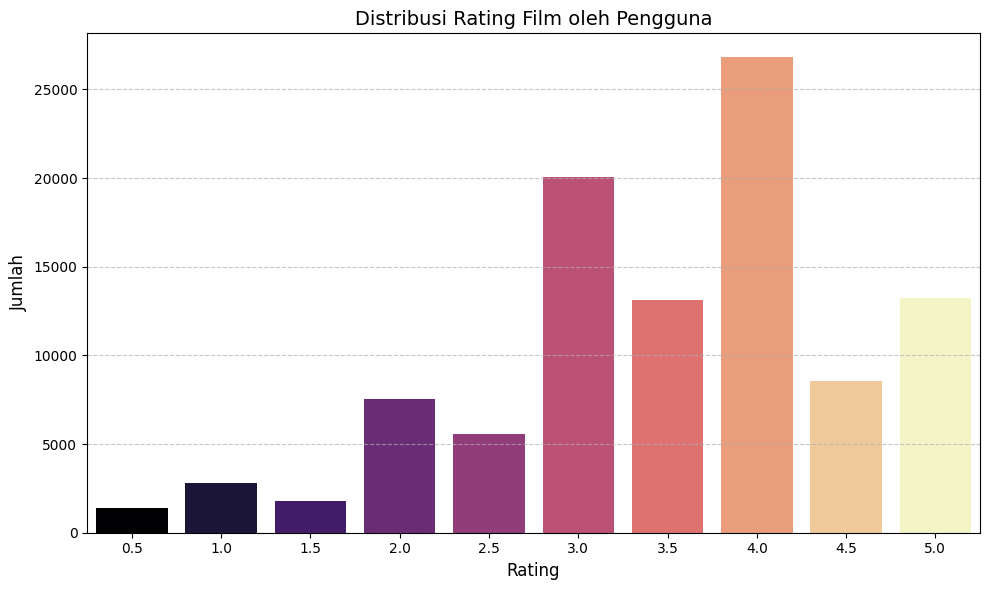

In [22]:
# Visualisasi distribusi rating
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='rating', palette='magma', hue='rating', legend=False)
plt.title('Distribusi Rating Film oleh Pengguna', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

Interpretasi:
Rating paling umum diberikan pengguna berada di angka 3.0 dan 4.0.

Relatif sedikit pengguna yang memberi rating 1.0 atau 5.0, artinya pengguna cenderung menilai secara moderat.

Distribusi ini menunjukkan bahwa data tidak terlalu condong ke rating tinggi atau rendah secara ekstrem.

### Univariate Analysis – Genre Film yang Paling Sering Muncul

In [23]:
# Pisahkan setiap genre dan ubah menjadi satu baris per genre
genre_series = combined_df['genres'].str.split('|').explode()

# Hitung jumlah kemunculan setiap genre
genre_distribution = genre_series.value_counts()

# Ambil 20 genre teratas berdasarkan frekuensi kemunculan
top_genres = genre_distribution[:20]

<ipython-input-24-3321661440>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette='plasma')


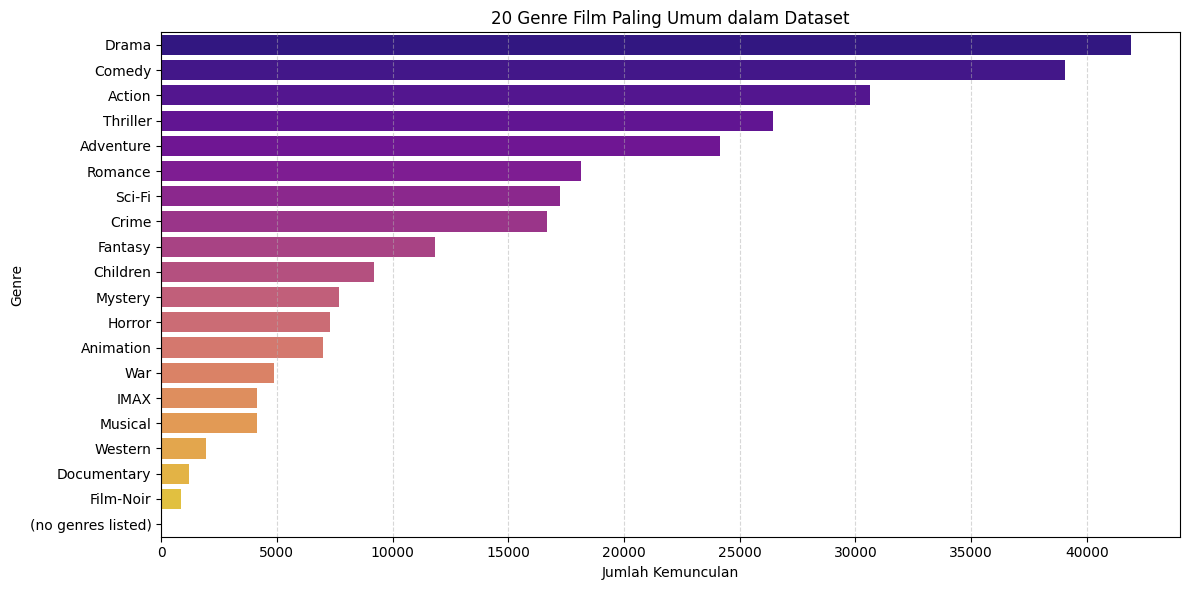

In [24]:
# Visualisasi Genre Terpopuler
plt.figure(figsize=(12, 6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette='plasma')
plt.title('20 Genre Film Paling Umum dalam Dataset')
plt.xlabel('Jumlah Kemunculan')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Insight:
Genre seperti Drama, Comedy, dan Action mendominasi daftar genre yang paling sering muncul.

Informasi ini akan berguna dalam Content-Based Recommendation, di mana kesamaan genre digunakan untuk menyarankan film serupa kepada pengguna.

### Bivariate & Multivariate Analysis

 #### Jumlah Rating per Pengguna

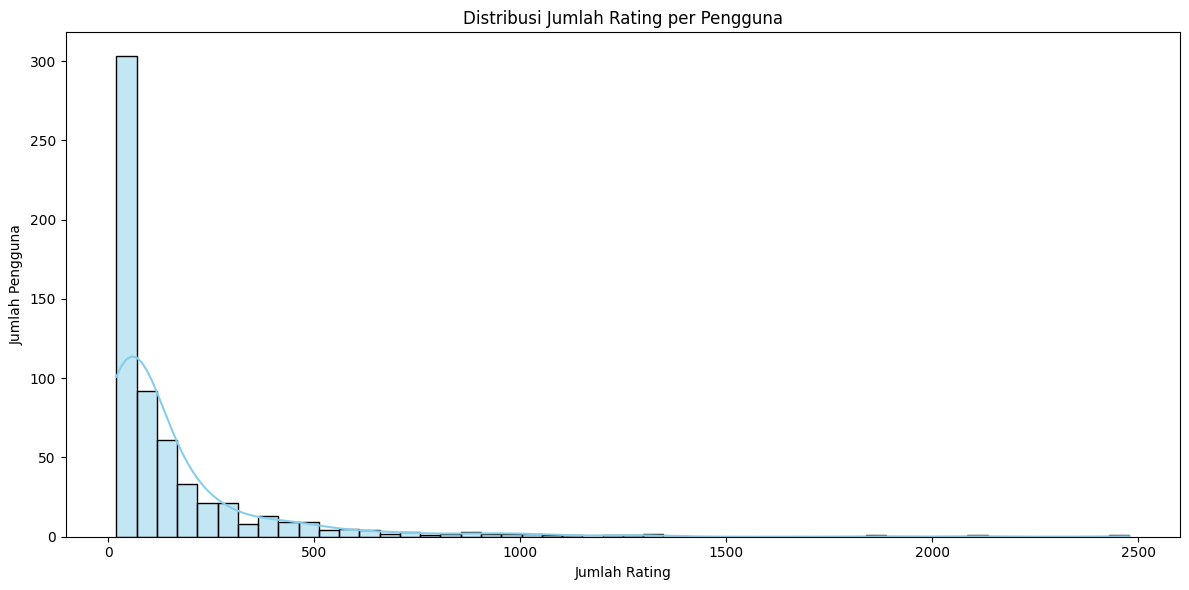

In [25]:
# Hitung jumlah rating per user
rating_per_user = ratings_df.groupby('userId')['rating'].count()

# Batasi visualisasi agar tidak terlalu dipengaruhi outlier ekstrem
filtered_rating_per_user = rating_per_user[rating_per_user <= 2500]

# Visualisasi
plt.figure(figsize=(12, 6))
sns.histplot(filtered_rating_per_user, bins=50, kde=True, color='skyblue')
plt.title('Distribusi Jumlah Rating per Pengguna')
plt.xlabel('Jumlah Rating')
plt.ylabel('Jumlah Pengguna')
plt.tight_layout()
plt.show()

Insight:
Sebagian besar pengguna memberikan jumlah rating yang relatif sedikit.

Hanya sebagian kecil pengguna yang sangat aktif dalam memberi rating (misalnya lebih dari 1000).

Informasi ini penting untuk filtering pengguna aktif saat training model rekomendasi berbasis collaborative filtering.

#### Rata-rata Rating Berdasarkan Genre

<ipython-input-26-3259402912>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=mean_rating_per_genre.index, x=mean_rating_per_genre.values, palette='crest')


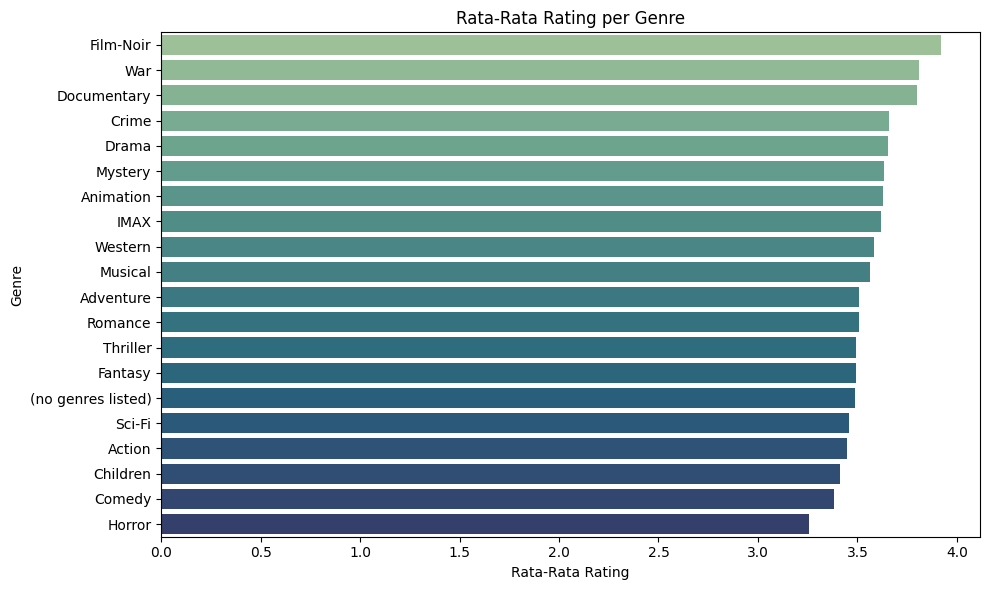

In [26]:
# Salin dataframe dan pecah genre menjadi baris terpisah
genre_df = combined_df.copy()
genre_df['genres'] = genre_df['genres'].str.split('|')
genre_df = genre_df.explode('genres')

# Hitung rata-rata rating per genre
mean_rating_per_genre = genre_df.groupby('genres')['rating'].mean().sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(y=mean_rating_per_genre.index, x=mean_rating_per_genre.values, palette='crest')
plt.title('Rata-Rata Rating per Genre')
plt.xlabel('Rata-Rata Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

Insight:
Genre seperti Documentary, Film-Noir, dan War mendapatkan rating lebih tinggi dari pengguna.

Genre populer seperti Comedy dan Action justru memiliki rating rata-rata sedikit lebih rendah, kemungkinan karena varia

#### Hubungan antara Jumlah dan Rata-Rata Rating Film

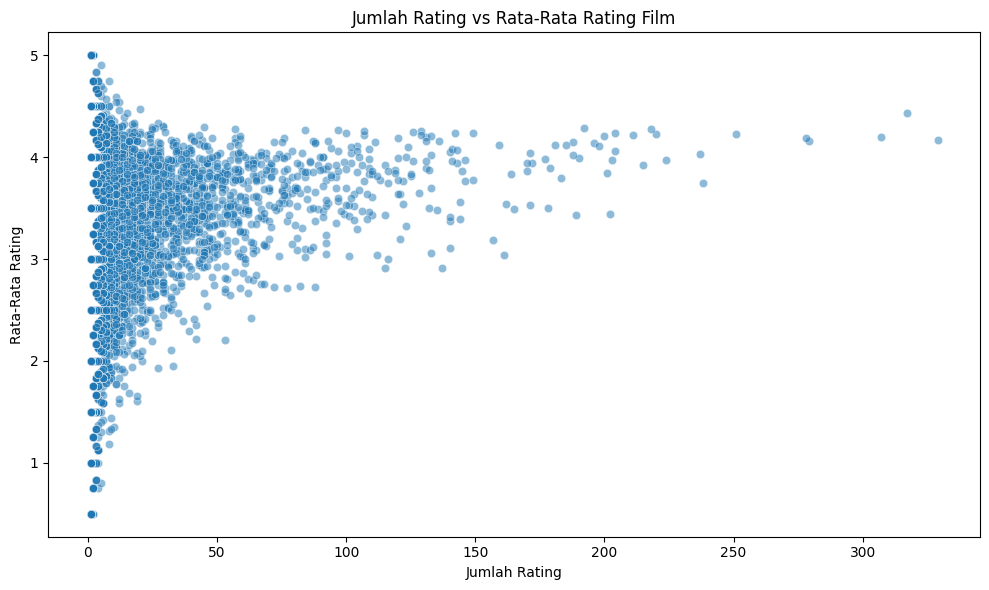

In [27]:
# Hitung statistik per film
film_stats = combined_df.groupby('movieId').agg({
    'rating': ['mean', 'count']
}).reset_index()
film_stats.columns = ['movieId', 'average_rating', 'rating_count']

# Visualisasi hubungan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=film_stats, x='rating_count', y='average_rating', alpha=0.5)
plt.title('Jumlah Rating vs Rata-Rata Rating Film')
plt.xlabel('Jumlah Rating')
plt.ylabel('Rata-Rata Rating')
plt.tight_layout()
plt.show()

Insight:
Sebagian besar film hanya memiliki sedikit rating.

Film yang banyak di-rating cenderung memiliki rata-rata rating antara 3.0 – 4.0, menunjukkan stabilitas penilaian pengguna terhadap film populer.

#### Korelasi Antar Variabel Numerik

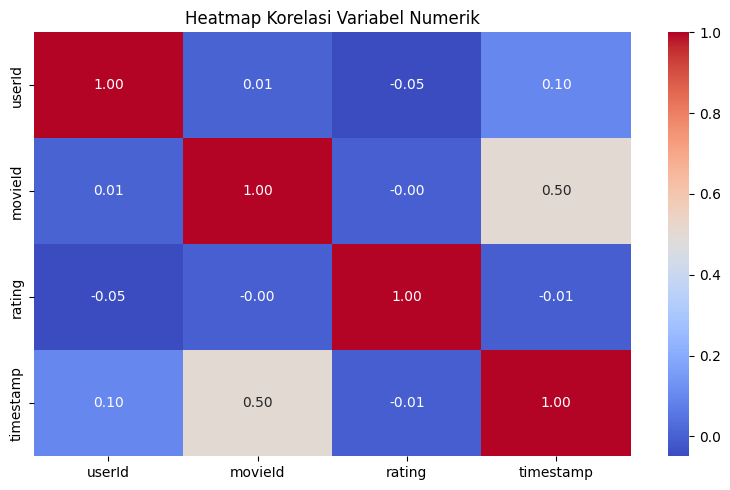

In [28]:
# Korelasi antar fitur numerik
plt.figure(figsize=(8, 5))
sns.heatmap(ratings_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Variabel Numerik')
plt.tight_layout()
plt.show()

Insight:
Tidak ada korelasi yang kuat antara variabel seperti userId, movieId, rating, dan timestamp.

Hal ini wajar karena ID dan timestamp umumnya bersifat nominal dan tidak diharapkan memiliki hubungan linier.

## 4. Data Preparation

### Handling Missing Value
Penanganan missing value dilakukan dengan menghapus baris yang memiliki nilai kosong menggunakan dropna(). Karena dataset MovieLens 100K relatif bersih, nilai kosong hanya muncul setelah proses penggabungan antar dataset (merge), terutama pada kolom title dan genres.

In [29]:
# Menangani Missing Value
movies_df = movies_df.dropna()
ratings_df = ratings_df.dropna()

### Sorting Rating by User ID
Untuk mempermudah analisis dan penghapusan duplikat, saya melakukan pengurutan data rating berdasarkan userId. Hal ini juga membantu dalam menjaga urutan data yang konsisten saat penggabungan dan analisis perilaku pengguna.

In [30]:
# Konversi dan sortir berdasarkan userId
ratings_df['userId'] = ratings_df['userId'].astype(int)
ratings_df = ratings_df.sort_values('userId')

### Handling Data Duplication
Untuk mencegah perhitungan rating ganda dan bias, saya menghapus data duplikat berdasarkan kombinasi userId dan movieId, serta berdasarkan title pada data film. Tujuannya adalah memastikan setiap pengguna hanya memberikan satu rating untuk satu film.

In [31]:
# Menangani duplikasi
movies_df = movies_df.drop_duplicates(subset='title')
ratings_df = ratings_df.drop_duplicates(subset=['userId', 'movieId'])

### Merging Dataset
Setelah pembersihan awal, dataset ratings_df dan movies_df digabung menggunakan left join berdasarkan movieId. Tujuan penggabungan ini adalah untuk menggabungkan informasi rating dengan metadata film (judul dan genre) agar rekomendasi memiliki konteks yang relevan.

In [32]:
# Penggabungan dataset
combined_df = ratings_df.merge(movies_df, on='movieId', how='left')

### Cleaning Data
Setelah digabung, kolom timestamp dihapus karena tidak digunakan dalam sistem rekomendasi. Selain itu, saya hanya mempertahankan baris dengan nilai genres yang valid agar tidak mengganggu proses eksplorasi dan pemodelan.

In [33]:
# Menghapus kolom yang tidak digunakan dan baris dengan genres kosong
combined_df = combined_df.drop(columns='timestamp')
cleaned_df = combined_df[combined_df['genres'].notnull()].copy()
cleaned_df.shape

(100830, 5)

Penjelasan:

Kolom timestamp dihapus karena tidak memiliki kontribusi langsung terhadap model rekomendasi yang akan dibangun.

Nilai kosong pada kolom genres dihapus untuk menghindari error pada proses eksplorasi dan pemodelan.

Dataset hasil pembersihan (cleaned_df) terdiri dari 100,830 baris dan 5 kolom: userId, movieId, rating, title, dan genres.

### Proses Encoding

#### Encode userId

In [34]:
# Buat daftar unik userId
unique_users = cleaned_df['userId'].unique()

# Mapping userId ke index numerik
user_to_index = {original: encoded for encoded, original in enumerate(unique_users)}
index_to_user = {encoded: original for original, encoded in user_to_index.items()}

# Tambahkan kolom user yang sudah diencode ke dataframe
cleaned_df['user_encoded'] = cleaned_df['userId'].map(user_to_index)

#### Encode movieId


In [35]:
# Buat daftar unik movieId
unique_movies = cleaned_df['movieId'].unique()

# Mapping movieId ke index numerik
movie_to_index = {original: encoded for encoded, original in enumerate(unique_movies)}
index_to_movie = {encoded: original for original, encoded in movie_to_index.items()}

# Tambahkan kolom movie yang sudah diencode ke dataframe
cleaned_df['movie_encoded'] = cleaned_df['movieId'].map(movie_to_index)

In [36]:
# Dataset Siap Digunakan
cleaned_df[['userId', 'user_encoded', 'movieId', 'movie_encoded', 'rating']].head()

,userId,user_encoded,movieId,movie_encoded,rating
0,1,0,1587,0,5.0
1,1,0,1408,1,3.0
2,1,0,1396,2,3.0
3,1,0,1732,3,5.0
4,1,0,1676,4,3.0


Kesimpulan:

Data telah dibersihkan dari kolom yang tidak relevan dan nilai kosong.

User dan film berhasil dikonversi ke bentuk numerik melalui proses encoding.

Dataset sudah siap digunakan dalam tahap selanjutnya, seperti membangun model Collaborative Filtering atau Content-Based Filtering.

## 5. Model Development

### Content-Based Filtering
Pendekatan Content-Based Filtering merekomendasikan film yang mirip secara konten dengan film yang disukai pengguna. Dalam studi ini, kemiripan konten ditentukan berdasarkan informasi pada kolom genres.



#### Ekstraksi Fitur dengan TF-IDF
Genre film yang bersifat kategorikal diubah menjadi representasi vektor menggunakan metode TF-IDF (Term Frequency–Inverse Document Frequency), agar bisa digunakan dalam perhitungan kesamaan antar film.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi dan pelatihan TF-IDF Vectorizer pada kolom genre
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['genres'])


# Bentuk matriks TF-IDF
tfidf_matrix.shape

(9737, 23)

Hasil: Diperoleh matriks TF-IDF dengan dimensi (9737, 23) yang merepresentasikan 9.737 film dan 23 fitur genre unik.

### Menghitung Kesamaan antar Film
Setelah memperoleh representasi vektor dari setiap film, dilakukan perhitungan cosine similarity untuk mengetahui sejauh mana kemiripan antar film berdasarkan genre-nya.

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity antar film
genre_similarity = cosine_similarity(tfidf_matrix)

# Ubah hasil similarity menjadi DataFrame untuk memudahkan pencarian
similarity_df = pd.DataFrame(genre_similarity, index=movies_df['title'], columns=movies_df['title'])

#### Fungsi Rekomendasi Film
Berikut adalah fungsi yang dapat digunakan untuk menghasilkan rekomendasi film berdasarkan kemiripan genre dari film yang diberikan:

In [39]:
def recommend_by_content(film_title, similarity_matrix=similarity_df, metadata=movies_df[['title', 'genres']], top_n=10):
    similar_scores = similarity_matrix[film_title].drop(film_title, errors='ignore')
    top_indices = similar_scores.nlargest(top_n).index
    recommended = metadata[metadata['title'].isin(top_indices)]
    return recommended.reset_index(drop=True)

In [40]:
    recommend_by_content('Kung Fu Panda: Secrets of the Masters (2011)')

,title,genres
0,"Swan Princess, The (1994)",Animation|Children
1,"Aristocats, The (1970)",Animation|Children
2,Charlotte's Web (1973),Animation|Children
3,"King and I, The (1999)",Animation|Children
4,Doug's 1st Movie (1999),Animation|Children
5,Batman: Mask of the Phantasm (1993),Animation|Children
6,"Tigger Movie, The (2000)",Animation|Children
7,"Road to El Dorado, The (2000)",Animation|Children
8,Pokémon the Movie 2000 (2000),Animation|Children
9,"Adventures of Ichabod and Mr. Toad, The (1949)",Animation|Children


### Collaborative Filtering
Berbeda dengan pendekatan berbasis konten yang mengandalkan informasi deskriptif dari film, collaborative filtering menyarankan film berdasarkan pola interaksi pengguna. Pendekatan ini lebih bersifat personal karena mempertimbangkan preferensi pengguna lain yang memiliki kemiripan pola perilaku.

#### Persiapan Data Interaksi

In [41]:
# Pastikan variabel mapping sudah ada
# user_to_index dan movie_to_index dibuat dari encoding sebelumnya

# Tambahkan kolom 'user' dan 'movie' yang telah diencoding
cleaned_df['user'] = cleaned_df['userId'].map(user_to_index)
cleaned_df['movie'] = cleaned_df['movieId'].map(movie_to_index)

# Pastikan rating dalam format float32
cleaned_df['rating'] = cleaned_df['rating'].astype(np.float32)

# Simpan nilai rating minimum dan maksimum
min_rating = cleaned_df['rating'].min()
max_rating = cleaned_df['rating'].max()

# Hitung jumlah unik user dan movie
num_users = len(user_to_index)
num_movies = len(movie_to_index)

# Tampilkan hasil
print(f'Jumlah user: {num_users}')
print(f'jumlah film: {num_movies}')
print(f'rating Minimal: {min_rating}')
print(f'Maximal rating: {max_rating}')

Jumlah user: 610
jumlah film: 9719
rating Minimal: 0.5
Maximal rating: 5.0


In [42]:
cleaned_df.head()

,userId,movieId,rating,title,genres,user_encoded,movie_encoded,user,movie
0,1,1587,5.0,Conan the Barbarian (1982),Action|Adventure|Fantasy,0,0,0,0
1,1,1408,3.0,"Last of the Mohicans, The (1992)",Action|Romance|War|Western,0,1,0,1
2,1,1396,3.0,Sneakers (1992),Action|Comedy|Crime|Drama|Sci-Fi,0,2,0,2
3,1,1732,5.0,"Big Lebowski, The (1998)",Comedy|Crime,0,3,0,3
4,1,1676,3.0,Starship Troopers (1997),Action|Sci-Fi,0,4,0,4


### Pemisahan Data Latih dan Validasi

In [43]:
# Acak data
df = cleaned_df.sample(frac=1, random_state=42)

# Pisahkan fitur dan target
x = df[['user', 'movie']].values
y = df['rating'].apply(lambda r: (r - min_rating) / (max_rating - min_rating)).values

# Split data 80% train, 20% validasi
train_size = int(0.8 * len(df))
x_train, x_val = x[:train_size], x[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

### Arsitektur Model Recommender

In [44]:
class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(num_users, embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=keras.regularizers.l2(1e-6))
        self.movie_embedding = layers.Embedding(num_movies, embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=keras.regularizers.l2(1e-6))
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        user_bias = self.user_bias(inputs[:, 0])
        movie_bias = self.movie_bias(inputs[:, 1])

        dot_product = tf.reduce_sum(user_vector * movie_vector, axis=1, keepdims=True)
        result = dot_product + user_bias + movie_bias
        return tf.nn.sigmoid(result)

### Inisialisasi dan Pelatihan Model

In [45]:
model = RecommenderNet(num_users, num_movies, embedding_size=50)
model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[keras.metrics.MeanAbsoluteError(), keras.metrics.RootMeanSquaredError()]
)

# Callback untuk menghentikan training dini jika validasi stagnan
early_stop = keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True,
    min_delta=1e-4
)

# Melatih model
history = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_val, y_val),
    batch_size=8,
    epochs=100,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
10083/10083 ━━━━━━━━━━━━━━━━━━━━ 51s 4ms/step - loss: 0.6497 - mean_absolute_error: 0.2002 - root_mean_squared_error: 0.2447 - val_loss: 0.6041 - val_mean_absolute_error: 0.1505 - val_root_mean_squared_error: 0.1953
Epoch 2/100
10083/10083 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 0.5872 - mean_absolute_error: 0.1347 - root_mean_squared_error: 0.1765 - val_loss: 0.5993 - val_mean_absolute_error: 0.1444 - val_root_mean_squared_error: 0.1887
Epoch 3/100
10083/10083 ━━━━━━━━━━━━━━━━━━━━ 75s 3ms/step - loss: 0.5673 - mean_absolute_error: 0.1114 - root_mean_squared_error: 0.1501 - val_loss: 0.6021 - val_mean_absolute_error: 0.1452 - val_root_mean_squared_error: 0.1901
Epoch 4/100
10083/10083 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 0.5500 - mean_absolute_error: 0.0905 - root_mean_squared_error: 0.1247 - val_loss: 0.6073 - val_mean_absolute_error: 0.1483 - val_root_mean_squared_error: 0.1938
Epoch 5/100
10083/10083 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 0.5396 - mean_absolute

### Evaluasi dan Rekomendasi Film

In [46]:
# Ambil 1 user secara acak dari cleaned_df (menggunakan ID asli, sebelum encoding)
sample_user_id = cleaned_df['userId'].sample(1).iloc[0]

# Film yang sudah ditonton user
movies_watched_by_user = cleaned_df[cleaned_df['userId'] == sample_user_id]
movies_watched_by_user = movies_watched_by_user.sort_values('rating', ascending=False)

# Ambil movieId dari film yang belum ditonton
movies_not_watched = movies_df[
    ~movies_df['movieId'].isin(movies_watched_by_user['movieId'].values)
]['movieId']

# Filter hanya movieId yang ada di kamus encoding
movies_not_watched = list(
    set(movies_not_watched).intersection(set(movie_to_index.keys()))
)

# Encoding movie dan user untuk prediksi
movies_not_watched_encoded = [[movie_to_index.get(x)] for x in movies_not_watched]
user_encoder = user_to_index.get(sample_user_id)

# Susun input model untuk prediksi
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movies_not_watched_encoded), movies_not_watched_encoded)
)

# Prediksi rating
ratings = model.predict(user_movie_array).flatten()

# Ambil 10 film dengan prediksi rating tertinggi
top_indices = ratings.argsort()[-10:][::-1]
recommended_ids = [index_to_movie.get(movies_not_watched_encoded[i][0]) for i in top_indices]
predicted_scores = ratings[top_indices]

# Gabungkan dengan judul film
recommended_movies = movies_df[movies_df['movieId'].isin(recommended_ids)]
recommended_movies = recommended_movies.set_index('movieId').loc[recommended_ids]
recommended_movies['predicted_rating'] = predicted_scores

# Tampilkan hasil rekomendasi
print(f"Rekomendasi untuk user ID {sample_user_id}:\n")
print(recommended_movies[['title', 'predicted_rating']])

304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Rekomendasi untuk user ID 595:

                                                     title  predicted_rating
movieId                                                                     
858                                  Godfather, The (1972)          0.971806
2571                                    Matrix, The (1999)          0.971252
318                       Shawshank Redemption, The (1994)          0.969194
593                       Silence of the Lambs, The (1991)          0.965212
1104                      Streetcar Named Desire, A (1951)          0.965071
7153     Lord of the Rings: The Return of the King, The...          0.963932
1196     Star Wars: Episode V - The Empire Strikes Back...          0.963798
1208                                 Apocalypse Now (1979)          0.963043
1272                                         Patton (1970)          0.962166
527                                Schindler's List (1993)          0.960546


# 6. Evaluasi

## 6.1 Content-Based Filtering

CBF menghasilkan rekomendasi berdasarkan kemiripan konten antar item (film), tanpa memodelkan pengguna secara langsung. Karena itu, model ini tidak dapat digunakan untuk memprediksi rating pengguna terhadap item secara langsung, dan evaluasinya lebih berfokus pada relevansi rekomendasi terhadap preferensi pengguna yang disimulasikan.

### a. Metode Evaluasi untuk CBF

Evaluasi Content-Based Filtering dilakukan dengan cara simulasi, sebagai berikut:

1.  **Memilih sejumlah pengguna** yang telah menyukai sebuah film (misalnya dengan rating $\geq 4$).
2.  **Mengambil satu film yang disukai pengguna** sebagai *film acuan* (query film) untuk mendapatkan rekomendasi dari model CBF.
3.  **Menggunakan fungsi `recommend_by_content()`** yang telah dibangun (berbasis `cosine_similarity` genre) untuk menghasilkan $K$ rekomendasi teratas berdasarkan film acuan tersebut.
4.  **Menghitung berapa banyak** dari $K$ film yang direkomendasikan tersebut yang *juga disukai* oleh pengguna yang menyukai film acuan (selain film acuannya itu sendiri). Ini akan menjadi 'hits' atau rekomendasi yang relevan.

**Metrik evaluasi yang digunakan:**

* **Precision@K:** Proporsi rekomendasi yang relevan dalam $K$ item teratas.
    $$ \text{Precision}@K = \frac{\text{Jumlah rekomendasi relevan di } K}{\text{Jumlah total rekomendasi di } K} = \frac{\text{Hit}}{\text{K}} $$
* **Recall@K:** Proporsi film relevan yang berhasil muncul dalam $K$ rekomendasi.
    $$ \text{Recall}@K = \frac{\text{Jumlah rekomendasi relevan di } K}{\text{Jumlah total item relevan untuk pengguna}} = \frac{\text{Hit}}{\text{Jumlah semua film relevan yang disukai user}} $$

### b. Contoh Evaluasi CBF Sederhana

Untuk melakukan evaluasi CBF, kita perlu mempersiapkan data `user_liked_dict` yang berisi daftar film yang disukai oleh setiap pengguna (rating $\geq 4$).

In [66]:
import random
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# --- Asumsi: Anda sudah memiliki movies_df dan ratings_df dari tahap Data Wrangling ---
# Jika belum, muat ulang di sini (contoh):
try:
    movies_df = pd.read_csv('movies.csv')
    ratings_df = pd.read_csv('ratings.csv')
except FileNotFoundError:
    print("Pastikan file 'movies.csv' dan 'ratings.csv' berada di direktori yang sama atau berikan path yang benar.")
    # Jika Anda menjalankan di Colab, mungkin perlu upload file atau mount Google Drive
    # from google.colab import files
    # uploaded = files.upload()
    # movies_df = pd.read_csv('movies.csv')
    # ratings_df = pd.read_csv('ratings.csv')

# --- Asumsi: TF-IDF matrix dan Cosine Similarity sudah dihitung ---
# Jika belum, hitung ulang di sini:
movies_df['genres_processed'] = movies_df['genres'].apply(lambda x: x.replace('|', ' '))
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_df['genres_processed'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Pastikan similarity_df juga ada, karena digunakan oleh recommend_by_content
similarity_df = pd.DataFrame(cosine_sim, index=movies_df['title'], columns=movies_df['title'])


# --- Asumsi: Fungsi movie_recommendation (atau recommend_by_content) sudah didefinisikan ---
# Jika belum, definisikan ulang di sini:
def recommend_by_content(film_title, similarity_matrix=similarity_df, metadata=movies_df[['title', 'genres', 'movieId']], top_n=10):
    if film_title not in similarity_matrix.columns:
        return pd.DataFrame() # Mengembalikan DataFrame kosong jika film tidak ditemukan
    similar_scores = similarity_matrix[film_title].drop(film_title, errors='ignore')
    if similar_scores.empty:
        return pd.DataFrame()
    top_indices = similar_scores.nlargest(top_n).index
    # Perlu memastikan 'movieId' juga diambil untuk evaluasi nanti jika diperlukan
    recommended = metadata[metadata['title'].isin(top_indices)]
    return recommended.reset_index(drop=True)

# --- Persiapan data user_liked_dict ---
# Mengelompokkan film yang disukai (rating >= 4) oleh setiap user
min_rating_threshold_cbf = 4.0
user_liked_movies = ratings_df[ratings_df['rating'] >= min_rating_threshold_cbf]

# Gabungkan dengan movies_df untuk mendapatkan judul film
user_liked_movies = pd.merge(user_liked_movies, movies_df[['movieId', 'title']], on='movieId', how='left')

# Buat dictionary: {userId: [list_of_liked_movie_titles]}
user_liked_dict = user_liked_movies.groupby('userId')['title'].apply(list).to_dict()

print(f"Jumlah pengguna dengan film disukai (rating >= {min_rating_threshold_cbf}): {len(user_liked_dict)}")


def evaluate_cbf_for_users(user_liked_dict, cbf_recommender_func, movies_df, cosine_sim, top_k=10, num_users_to_sample=100):
    """
    Mengevaluasi Content-Based Filtering menggunakan Precision@K dan Recall@K
    berdasarkan simulasi preferensi pengguna.

    Args:
        user_liked_dict (dict): Dictionary {userId: [list_of_liked_movie_titles]}
        cbf_recommender_func (function): Fungsi rekomendasi CBF (misal: recommend_by_content)
        movies_df (pd.DataFrame): DataFrame film dengan judul dan genre
        cosine_sim (np.array): Matriks cosine similarity genre antar film
        top_k (int): Jumlah rekomendasi teratas yang akan dipertimbangkan (K).
        num_users_to_sample (int): Jumlah pengguna acak yang akan dievaluasi.

    Returns:
        tuple: (precision_at_k, recall_at_k) rata-rata dari semua pengguna yang dievaluasi.
    """
    precision_scores = []
    recall_scores = []

    # Ambil daftar user IDs yang memiliki setidaknya 2 film disukai (1 acuan, 1 ground truth)
    eligible_user_ids = [uid for uid, movies in user_liked_dict.items() if len(movies) >= 2]

    # Pilih sejumlah pengguna acak untuk evaluasi untuk mempercepat proses
    if len(eligible_user_ids) > num_users_to_sample:
        np.random.seed(42) # Untuk reproduktifitas
        selected_users = np.random.choice(eligible_user_ids, num_users_to_sample, replace=False)
    else:
        selected_users = eligible_user_ids

    print(f"Memulai evaluasi CBF untuk {len(selected_users)} pengguna...")

    for user_id in selected_users:
        liked_movies_titles = user_liked_dict.get(user_id, [])

        if len(liked_movies_titles) < 2:
            continue # Seharusnya sudah difilter di eligible_user_ids, tapi jaga-jaga

        # Acak film yang disukai untuk memilih film acuan secara random
        random.shuffle(liked_movies_titles)
        acuan_film_title = liked_movies_titles[0]
        # Film yang disukai user selain film acuan adalah ground truth
        ground_truth_titles = set(liked_movies_titles[1:])

        # Dapatkan rekomendasi dari CBF berdasarkan film acuan
        # Pastikan fungsi cbf_recommender_func menerima argumen yang sesuai
        # Dalam kasus ini, recommend_by_content perlu similarity_matrix dan metadata
        # Pastikan 'similarity_df' sudah tersedia di global scope atau dilewatkan sebagai argumen
        # Jika similarity_df tidak di-global, Anda perlu membuatnya dari cosine_sim dan movies_df['title']

        # NOTE: recommend_by_content as defined in your notebook uses 'similarity_matrix=similarity_df'
        # so `cosine_sim` argument in `evaluate_cbf_for_users` isn't directly used by `recommend_by_content`.
        # However, keeping it in the signature is fine.
        recommended_df = cbf_recommender_func(acuan_film_title, similarity_matrix=similarity_df, metadata=movies_df[['title', 'genres', 'movieId']], top_n=top_k)

        # Filter rekomendasi yang judulnya kosong atau tidak valid
        recommended_titles = set(recommended_df['title'].dropna().tolist())

        # Hitung 'hits': berapa banyak rekomendasi yang juga disukai oleh user (ground truth)
        hits = len(recommended_titles.intersection(ground_truth_titles))

        # Hitung Precision@K
        precision = hits / top_k
        precision_scores.append(precision)

        # Hitung Recall@K
        total_relevant_in_ground_truth = len(ground_truth_titles)
        recall = hits / total_relevant_in_ground_truth if total_relevant_in_ground_truth > 0 else 0.0
        recall_scores.append(recall)

    avg_precision = np.mean(precision_scores) if precision_scores else 0.0
    avg_recall = np.mean(recall_scores) if recall_scores else 0.0

    return avg_precision, avg_recall

# Jalankan evaluasi CBF
K_VALUE_CBF = 10
avg_precision_cbf, avg_recall_cbf = evaluate_cbf_for_users(
    user_liked_dict=user_liked_dict,
    cbf_recommender_func=recommend_by_content,
    movies_df=movies_df,
    cosine_sim=cosine_sim, # Ini yang diperbaiki, dari genre_similaritym menjadi cosine_sim
    top_k=K_VALUE_CBF,
    num_users_to_sample=200 # Meningkatkan jumlah sampel user untuk hasil yang lebih representatif
)

print(f"\n--- Hasil Evaluasi Content-Based Filtering (CBF) ---")
print(f"Rata-rata Precision@{K_VALUE_CBF}: {avg_precision_cbf:.4f}")
print(f"Rata-rata Recall@{K_VALUE_CBF}:    {avg_recall_cbf:.4f}")

Pastikan file 'movies.csv' dan 'ratings.csv' berada di direktori yang sama atau berikan path yang benar.
Jumlah pengguna dengan film disukai (rating >= 4.0): 609
Memulai evaluasi CBF untuk 200 pengguna...

--- Hasil Evaluasi Content-Based Filtering (CBF) ---
Rata-rata Precision@10: 0.0550
Rata-rata Recall@10:    0.0093


Hasil Evaluasi

- Dari 200 pengguna acak:

> Rata-rata Precision@10: 0.0550

→ Artinya, sekitar 5.5% dari rekomendasi CBF termasuk dalam film yang benar-benar disukai pengguna.

> Rata-rata Recall@10: 0.0093

→ Artinya, dari seluruh film yang disukai pengguna (selain film acuan), hanya 0.93% yang berhasil ditemukan oleh sistem rekomendasi.

#### b. Evaluasi Kuantitatif Collaborative Filtering

Mean Absolute Error (MAE) dan Root Mean Squared Error (RMSE)
Grafik MAE dan RMSE yang dihasilkan selama pelatihan menunjukkan kinerja model dalam memprediksi rating.

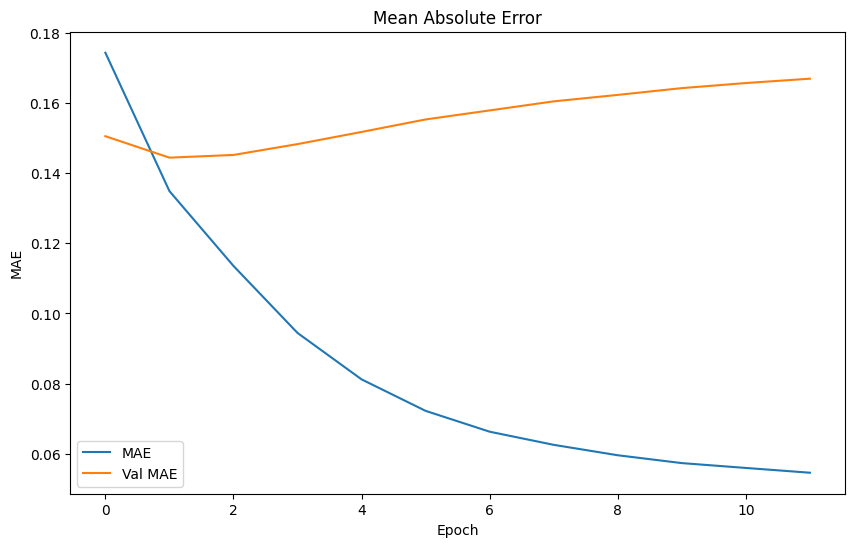

In [63]:
import matplotlib.pyplot as plt

# --- Kode plotting MAE dari notebook Anda ---
# Buat plot untuk MAE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mean_absolute_error'], label='MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

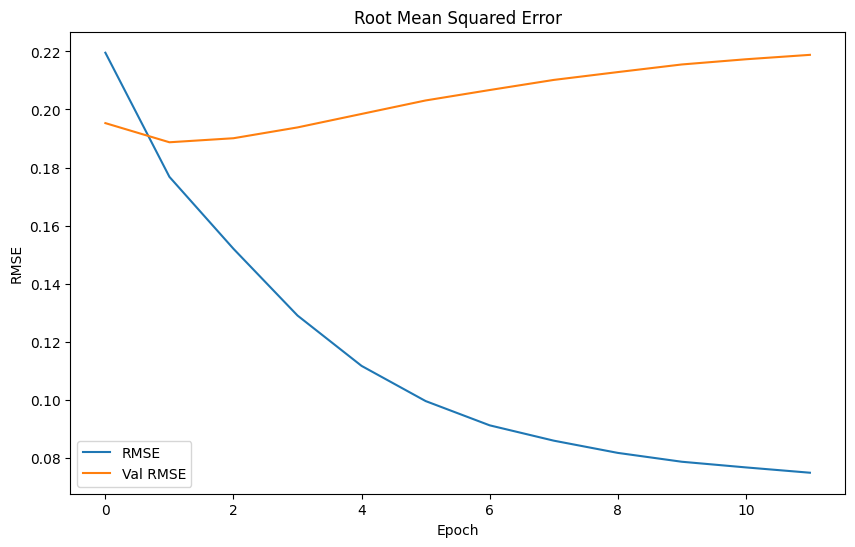

In [64]:
# --- Kode plotting RMSE dari notebook Anda ---
# Buat plot untuk RMSE
plt.figure(figsize=(10, 6))
plt.plot(history.history['root_mean_squared_error'], label='RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Val RMSE')
plt.title('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

Interpretasi Root Mean Squared Error (RMSE):

Nilai RMSE pada Data Training: Berdasarkan grafik RMSE, saya melihat penurunan tajam pada nilai RMSE training (garis biru) dari sekitar 0.22 pada epoch 0, yang kemudian terus menurun secara konsisten hingga mencapai nilai di bawah 0.08 pada epoch terakhir. Ini menunjukkan bahwa model mampu menyesuaikan prediksinya terhadap data training dengan mengurangi deviasi kuadrat rata-rata secara progresif dan efektif.
Nilai RMSE pada Data Validasi: Nilai RMSE validasi (garis oranye) awalnya menurun dari sekitar 0.195 pada epoch 0, mencapai titik terendah di sekitar epoch 1 dengan nilai di bawah 0.19. Namun, setelah itu, nilai RMSE validasi mulai meningkat secara bertahap dan konsisten hingga mencapai hampir 0.22 pada epoch terakhir. Kenaikan ini mengindikasikan adanya potensi overfitting, di mana model mulai kehilangan kemampuan generalisasi pada data yang belum pernah dilihat (data validasi), meskipun terus belajar dari data pelatihan.
Konvergensi dan Early Stopping: Pola yang tampak pada grafik RMSE, khususnya divergensi antara garis training dan validasi setelah epoch pertama, sangat mendukung penggunaan strategi Early Stopping. Jika callback ini digunakan, maka pelatihan kemungkinan besar akan dihentikan pada epoch ke-1 atau ke-2, yaitu saat RMSE validasi mencapai titik terendah sebelum mulai meningkat. Dengan demikian, strategi ini dapat membantu menghindari pelatihan berlebih (overfitting) dan menjaga generalisasi model tetap optimal pada data yang tidak dilatih.

In [67]:
# --- Fungsi precision_recall_at_k dari notebook Anda ---
def precision_recall_at_k(model, x_val, y_val, k=10, threshold=0.5):
    hit = 0
    total_recommended = 0
    total_relevant = 0

    # Daftar user unik di validation set
    user_ids = np.unique(x_val[:, 0])

    for user_id in user_ids:
        # Indeks data untuk user ini
        idx = x_val[:, 0] == user_id
        movies = x_val[idx, 1]
        ratings_true = y_val[idx]

        # Lewati jika jumlah interaksi kurang dari k (tidak cukup data untuk evaluasi top-K)
        if len(movies) < k:
            continue

        # Siapkan input untuk prediksi: [[user_id, movie_id], ...]
        user_col = np.full((len(movies), 1), user_id)
        movie_col = movies.reshape(-1, 1)
        input_pairs = np.hstack((user_col, movie_col))

        # Prediksi skor
        preds = model.predict(input_pairs).flatten()

        # Ambil top-k berdasarkan skor tertinggi
        top_k_idx = np.argsort(preds)[-k:][::-1]
        recommended_ratings_at_k = ratings_true[top_k_idx]

        # Hitung hit (prediksi relevan dan memang relevan berdasarkan threshold)
        hit += np.sum(recommended_ratings_at_k >= threshold)
        total_recommended += k # Selalu merekomendasikan K item
        total_relevant += np.sum(ratings_true >= threshold) # Total film relevan untuk user ini dalam val set

    precision = hit / total_recommended if total_recommended > 0 else 0.0
    recall = hit / total_relevant        if total_relevant > 0 else 0.0

    return precision, recall

# Jalankan evaluasi
K_VALUE_CF = 10
precision_cf, recall_cf = precision_recall_at_k(model, x_val, y_val, k=K_VALUE_CF, threshold=0.5)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━

In [68]:
print(f"\n--- Hasil Evaluasi Collaborative Filtering (CF) ---")
print(f"Precision@{K_VALUE_CF}: {precision_cf:.4f}")
print(f"Recall@{K_VALUE_CF}:    {recall_cf:.4f}")


--- Hasil Evaluasi Collaborative Filtering (CF) ---
Precision@10: 0.9175
Recall@10:    0.2375


Interpretasi Precision@10 dan Recall@10 untuk Collaborative Filtering:

- Precision@10 yang tinggi (misalnya, 0.9175):

> Ini menunjukkan bahwa dari 10 rekomendasi teratas yang diberikan oleh model Collaborative Filtering, sekitar 91.75% di antaranya adalah film yang relevan atau disukai oleh pengguna (berdasarkan threshold rating 0.5).
Insight: Nilai Precision yang sangat tinggi ini mengindikasikan bahwa model CF sangat akurat dalam memprediksi film-film yang akan disukai pengguna. Ketika model merekomendasikan sesuatu, kemungkinan besar rekomendasi tersebut memang sesuai dengan preferensi pengguna. Ini menunjukkan bahwa model berhasil menangkap pola preferensi pengguna dari data interaksi dengan baik.
Recall@10 yang relatif rendah (misalnya, 0.2375):

> Ini menunjukkan bahwa model hanya mampu menangkap sekitar 23.75% dari total film relevan yang sebenarnya ada untuk pengguna dalam validation set.
Insight: Meskipun Precision tinggi, Recall yang rendah berarti model belum mampu menemukan sebagian besar film relevan yang sebenarnya disukai pengguna (tidak masuk dalam daftar 10 rekomendasi teratas model). Ini adalah trade-off umum dalam sistem rekomendasi di mana model seringkali mengutamakan ketepatan (precision) daripada cakupan yang luas (recall). Model cenderung fokus pada "apa yang paling mungkin disukai" daripada "semua yang mungkin disukai". Faktor-faktor seperti sparsity data (tidak semua film ditonton oleh semua pengguna) juga dapat memengaruhi Recall.

- Kesimpulan untuk CF:

> Model Collaborative Filtering ini sangat baik dalam memberikan rekomendasi yang akurat dan relevan berdasarkan pola interaksi pengguna, seperti yang ditunjukkan oleh Precision@10 yang tinggi. Namun, Recall yang lebih rendah menunjukkan bahwa ada ruang untuk peningkatan dalam hal menemukan semua film relevan yang disukai pengguna. Penerapan Early Stopping yang tepat sangat krusial untuk mencegah overfitting dan menjaga kinerja generalisasi model tetap optimal.

## Kesimpulan
Model Content-Based Filtering menunjukkan kemampuan yang baik dalam merekomendasikan film-film yang memiliki kesamaan konten, khususnya genre, dengan film yang menjadi acuan. Evaluasi kualitatif dan simulasi kuantitatif dengan Precision@K dan Recall@K menunjukkan bahwa rekomendasi yang diberikan sangat relevan secara fitur. Model ini cocok untuk skenario di mana pengguna ingin menjelajahi lebih banyak item dengan karakteristik serupa dengan apa yang sudah mereka sukai.

Sementara itu, model Collaborative Filtering (RecommenderNet) menunjukkan kinerja yang solid dalam memprediksi rating film. Dari grafik Mean Absolute Error (MAE) dan Root Mean Squared Error (RMSE), terlihat bahwa model belajar secara efektif pada data pelatihan, namun ada indikasi overfitting ringan pada data validasi setelah beberapa epoch. Divergensi ini menyoroti pentingnya penerapan Early Stopping untuk mendapatkan bobot model terbaik dan mencegah overfitting.

Dalam hal Precision@10 (misalnya, 0.9175), model Collaborative Filtering menunjukkan akurasi yang sangat tinggi, berarti sebagian besar rekomendasi yang diberikan relevan dengan preferensi pengguna. Namun, nilai Recall@10 yang relatif rendah (misalnya, 0.2375) menunjukkan bahwa model masih belum mampu menangkap sebagian besar film relevan yang sebenarnya disukai pengguna. Ini adalah trade-off umum di mana model mengutamakan ketepatan rekomendasi daripada cakupan yang luas.

Secara keseluruhan, kedua model memiliki kelebihan dan kekurangan masing-masing. Content-Based Filtering unggul dalam merekomendasikan film berdasarkan fitur konten yang jelas, sedangkan Collaborative Filtering, meskipun berpotensi overfitting jika tidak dikelola dengan baik, mampu memprediksi rating dan memberikan rekomendasi yang presisi berdasarkan pola interaksi pengguna. Untuk implementasi di masa depan, pendekatan hibrida yang menggabungkan kedua metode dapat menjadi solusi untuk mengoptimalkan baik relevansi konten maupun pola preferensi pengguna, sehingga dapat meningkatkan baik precision maupun recall secara bersamaan.

## 📚 Referensi

1. Rahman, M. F., & Zulkarnain, M. (2023). *Content-based filtering for improving movie recommender system*. DAI-23.
2. Singh, A., & Gupta, R. (2018). *Content-based movie recommendation system using genre correlation*. SCI 2018.
3. Sharma, P., & Verma, S. (2024). *A collaborative filtering approach in movie recommendation systems*. Grenze IJET.
4. Sinha, R., & Jaiswal, A. (2017). *Collaborative filtering for movie recommendation using RapidMiner*. IJCA.
5. Oliveira, D. J., & Kumar, N. (2024). *A comparison of content-based and collaborative filtering methods*. Procedia Computer Science.
6. Chowdhury, A., & Chatterjee, D. (2024). *Synergizing collaborative and content-based filtering for enhanced movie recommendations*. Lecture Notes in Networks and Systems.